In [164]:
import random
import time
import math
import numpy as np
import matplotlib.pyplot as plt



# world = [
#     [0, 0, 0, 0, 0, 1, 0, 0],
#     [0, 1, 1, 1, 1, 1, 0, 0],
#     [0, 1, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 1, 1, 1, 0],
#     [0, 1, 1, 0, 0, 0, 1, 0],
#     [0, 1, 1, 0, 0, 0, 1, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0]
# ]
world = np.zeros((8,8))
rewardGrid = np.full((8, 8), -0.04)
utilities = np.zeros(rewardGrid.shape)
rewardGrid[7][1] = 1
rewardGrid[0][7] = 5000



In [165]:
def policy(state, world, utilities, epsilon):
    actions = checkPossibleActions(state, world)
    actionReward = -1000000
    currentAction = None
    if random.random() < epsilon:
        return random.choice(actions)
    for action in actions:
        if utilities[action[0]][action[1]] >= actionReward:
            currentAction = action
            actionReward = utilities[action[0]][action[1]]
    if currentAction == None: return random.choice(actions)
    return currentAction

def checkPossibleActions(state, world):
    actions = []
    if state[0] -1 >= 0:
        if world[state[0]-1][state[1]] == 0: 
            actions.append([state[0]-1,state[1], "u"])
        
    if state[0] +1 <= len(world) -1:
        if world[state[0]+1][state[1]] == 0: 
            actions.append([state[0]+1,state[1], "d"])
        
    if state[1] -1 >= 0:
        if world[state[0]][state[1]-1] == 0: 
            actions.append([state[0],state[1]-1, "l"])
        
    if state[1] +1 <= len(world[0])-1:
        if world[state[0]][state[1]+1] == 0: 
            actions.append([state[0],state[1]+1, "r"])
    return actions
    

def printUtilities(matrix):
    for i in range(len(matrix)):
        print(np.around(matrix[i], decimals=4))

def learningAgent(initialPosition, world, rewardGrid, utilities, iterations=100000000, epsilon=0.1):
    ns = np.zeros(rewardGrid.shape)
    alpha = 0.0001
    gamma = 1
    state = initialPosition
    lastState = None
    action = None
    count = 0
    steps = 0
    totalSteps = []
    while True:
        epsilon = max(1 - (0.00001 * np.sum(totalSteps)), 0.05)
        steps += 1
        x = state[0]
        y = state[1]
#         stateQueue.put(state)
        if ns[x][y] == 0:
            utilities[x][y] = rewardGrid[x][y]
        if lastState:
            lastX = lastState[0]
            lastY = lastState[1]
            ns[lastX][lastY] += 1
#             alpha = 10 * ns[lastX][lastY] / (20 * ns[lastX][lastY]) 
            alpha = 60/(59 + ns[lastX][lastY])
            utilities[lastX][lastY] += alpha * (rewardGrid[lastX][lastY] + gamma * utilities[x][y] - utilities[lastX][lastY])
        if rewardGrid[x][y] > 0:
            count += 1
            print("***********************************", rewardGrid[x][y])
            print("times Won:",count)
            print("Steps taken:",steps)
            print("alpha: ",alpha)
            print("epsilon: ", epsilon)
            printUtilities(utilities)
            totalSteps.append(steps)
            steps = 0
            if count != 500:
                state = [random.randint(0,7), random.randint(0,7)]
                print("New Position: ", state)
                continue
            return totalSteps
        else:
            lastState = state
            action = policy(state, world, utilities, epsilon)
            state = [action[0], action[1]]
#             stateQueue.put(state)
    return totalSteps
            
            
    
def evaluate(world, utilities, initialPosition, rewardGrid, iterations=1):
    moves = np.chararray(world.shape, unicode=True, itemsize=2)
    moves[:] = ' '
    state = initialPosition
    for i in range(len(utilities)):
        for j in range(len(utilities[i])):
            actions = checkPossibleActions([i, j], world)
            actionReward = -1000000
            for action in actions:
                if utilities[action[0]][action[1]] >= actionReward:
                    currentAction = action
                    moves[i][j] = action[2]
                    actionReward = utilities[action[0]][action[1]]
#     print(moves)
    results = np.chararray(world.shape, unicode=True, itemsize=2)
    for i in range(len(utilities)):
        for j in range(len(utilities[0])):
            state = [i,j]
            visited = [[i,j]]
            firstAction = policy(state, world, utilities, 0)
            results[i][j] = firstAction[2]
            while rewardGrid[state[0]][state[1]] <= 0:
                x = state[0]
                y = state[1]
                action = policy(state, world, utilities, 0)
                state = [action[0], action[1]]
                isVisited = False
#                 print(visited)
                for k in range(len(visited)):
                    if np.array_equal(visited[k], state):
                        isVisited = True
                if isVisited == False:
                    visited.append(state)
                    moves[x][y] = action[2]
                else:
                    print("continue", i, j)
                    results[i][j] = results[i][j] + "*"
                    break
    print(results)
        
        
    
    
    

*********************************** 1.0
times Won: 1
Steps taken: 4
alpha:  0.9836065573770492
epsilon:  1.0
[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0.]
[-0.12  0.    0.    0.    0.    0.    0.    0.  ]
[0.943 1.    0.    0.    0.    0.    0.    0.   ]
New Position:  [2, 2]
*********************************** 5000.0
times Won: 2
Steps taken: 92
alpha:  1.0
epsilon:  0.99996
[ 0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00
 -8.00000e-02  4.99996e+03  5.00000e+03]
[ 0.      0.      0.     -0.2725 -0.1193 -0.0807 -0.16   -0.12  ]
[ 0.     -0.12   -0.08   -0.2706 -0.1917 -0.12   -0.08   -0.08  ]
[ 0.      0.      0.     -0.2031 -0.1893 -0.2362  0.     -0.08  ]
[ 0.      0.      0.     -0.2986 -0.2354 -0.08   -0.1207 -0.08  ]
[ 0.      0.     -0.08   -0.2384 -0.1622  0.     -0.08   -0.1587]
[-0.12    0.     -0.2    -0.1207 -0.2313 -0.0837 -0.08    0.    ]
[-0.047 

 3659.7474]
[ 26.2223  32.2607 108.9062 148.7368 265.3149 438.7444 454.1286 452.3048]
[ 40.8742  40.9172  73.2064  94.8192 339.0081 360.5204 365.5907 338.1231]
[ 30.9734  33.7504  46.6129  73.2923 110.1697 135.4826 268.948  274.2381]
[ 28.6203  35.0277  40.1607  79.2856 124.3436 153.4371 256.1282 203.4392]
[161.6554  48.7303  39.8545  32.0129  70.9263  62.7346  49.0506  82.741 ]
[93.3813  1.     35.1944 29.5098 32.1643 19.54   34.2889 24.2678]
New Position:  [4, 6]
*********************************** 5000.0
times Won: 38
Steps taken: 36
alpha:  0.5607476635514018
epsilon:  0.97008
[   7.8511   41.4636  192.3524  303.4675  570.1251 1198.0712 3342.1601
 5000.    ]
[  50.7577  199.6314  203.4971  265.0876  360.9579  526.4436 1176.9554
 1495.3818]
[ 26.2223  32.2607 108.9062 148.7368 265.3149 438.7444 738.4285 440.9917]
[ 40.8742  40.9172  73.2064  94.8192 339.0081 361.8622 405.9059 334.2259]
[ 30.9734  33.7504  46.6129  73.2923 110.1697 172.2347 301.7445 254.3114]
[ 28.6203  35.0277  40.1

[ 59.3773   1.     127.0577 108.7075 132.805  173.4935 206.847  190.4461]
New Position:  [4, 4]
*********************************** 5000.0
times Won: 66
Steps taken: 172
alpha:  0.46511627906976744
epsilon:  0.9545399999999999
[ 123.5444  134.1784  264.6088  495.4782  625.0305  984.272  2020.0109
 5000.    ]
[ 101.5206  190.8214  313.7446  405.4668  612.6143 1350.7435 1959.2802
 3421.4838]
[  98.1402  143.2723  232.8517  428.8936  760.0457 1070.681  1051.0554
 1679.2019]
[ 127.968   177.3728  229.6799  292.233   404.0622  615.4914  804.5228
 1074.2406]
[ 86.6158 145.8719 162.8688 245.1339 385.9674 446.2376 575.3012 646.4036]
[ 85.2527 140.9558 144.2671 136.5603 236.735  339.69   294.6104 281.5738]
[148.6351 134.4806  88.5655 150.5777 174.2478 235.9459 243.6874 216.3309]
[ 59.3773   1.     127.0577 122.364  171.3598 202.4946 204.0321 214.1381]
New Position:  [0, 7]
*********************************** 5000.0
times Won: 67
Steps taken: 1
alpha:  0.46153846153846156
epsilon:  0.95282
[ 123

Steps taken: 43
alpha:  0.35502958579881655
epsilon:  0.94127
[ 246.6574  397.2592  531.2495  663.3537  863.8807 1558.6432 1858.8935
 5000.    ]
[ 232.3623  390.385   512.0654  850.2556 1088.2111 1325.0537 1847.8334
 3319.9011]
[ 189.1915  394.5482  680.1594  768.4391  937.7322 1241.3723 1739.2586
 2213.9582]
[ 222.5577  299.7055  497.0899  579.1082  850.1407 1084.3503 1319.2386
 1044.9251]
[225.546  243.6774 433.1242 476.1783 626.1743 671.4811 832.4177 662.0958]
[227.0212 192.2002 184.7853 247.1851 384.5467 421.5758 517.1279 513.8903]
[198.5289 197.0718 332.6231 224.4919 296.0109 278.6501 369.0428 441.7774]
[183.599    1.     141.2446 155.1518 219.1719 203.6917 267.2131 358.3911]
New Position:  [0, 1]
*********************************** 5000.0
times Won: 93
Steps taken: 177
alpha:  0.4195804195804196
epsilon:  0.94084
[ 413.3596  397.68    581.6944  684.757   929.1729 1558.6432 3176.8235
 5000.    ]
[ 230.7126  383.9174  645.1064  800.2593 1000.2263 1442.3988 1851.4075
 2288.3663]
[ 2

*********************************** 5000.0
times Won: 122
Steps taken: 80
alpha:  0.3
epsilon:  0.9177
[ 560.4262  636.4924  730.9908 1027.572  1479.0791 1692.7164 2119.6727
 5000.    ]
[ 548.3989  600.8424  828.5664 1047.9663 1470.6768 1735.8138 1893.6114
 2818.7637]
[ 534.9946  653.7299  722.471   828.9241 1410.7203 1483.7168 1790.1193
 1874.1028]
[ 441.2552  475.97    658.7092  662.9178  981.8481 1059.5175 1369.9498
 1397.8297]
[ 402.1353  446.7424  501.2677  556.8039  681.3975  924.9807 1003.3761
  790.2556]
[397.9729 385.1788 403.6621 479.5747 537.8504 690.4687 706.5257 640.6274]
[526.4327 782.2116 388.1006 388.4101 509.6206 497.3834 561.9251 577.7526]
[747.0742   1.     400.4975 374.2785 371.6188 470.8376 426.6625 379.5493]
New Position:  [5, 3]
*********************************** 5000.0
times Won: 123
Steps taken: 36
alpha:  0.297029702970297
epsilon:  0.9169
[ 560.4262  636.4924  730.9908 1027.572  1479.0791 1692.7164 2119.6727
 5000.    ]
[ 548.3989  600.8424  828.5664 1047.96

*********************************** 5000.0
times Won: 153
Steps taken: 25
alpha:  0.2510460251046025
epsilon:  0.89772
[ 675.3352  880.4864 1166.4895 1352.0866 1683.6317 2055.0376 2395.245
 5000.    ]
[ 682.1481  787.6277 1012.2497 1496.8223 1761.6096 1998.3447 2476.9638
 3139.3646]
[ 700.4744  776.3005 1030.6728 1290.2273 1429.8074 1708.8123 2136.6864
 1939.3711]
[ 629.2352  698.8585  810.5528 1103.3511 1114.4995 1348.1901 1536.6671
 1313.5042]
[ 596.2464  659.6507  796.5058  847.1406  864.9584 1162.4511 1079.9756
 1105.0451]
[573.1695 588.1275 690.1323 695.8281 750.5557 841.5442 795.244  954.6727]
[557.6394 540.8885 587.1022 555.1932 649.7414 597.8802 622.5451 679.7327]
[569.0566   1.     541.0593 531.5217 496.1861 532.6567 573.1143 518.2714]
New Position:  [3, 5]
*********************************** 5000.0
times Won: 154
Steps taken: 30
alpha:  0.2564102564102564
epsilon:  0.89747
[ 675.3352  880.4864 1166.4895 1352.0866 1683.6317 2123.9149 2997.9693
 5000.    ]
[ 682.1481  787.6277 

*********************************** 5000.0
times Won: 178
Steps taken: 29
alpha:  0.2
epsilon:  0.88148
[ 864.9569 1020.7009 1141.9775 1388.7049 1820.2581 1964.3344 2313.005
 5000.    ]
[ 803.1689  946.9875 1163.434  1408.4466 1846.1475 2124.7264 2493.3324
 3292.2688]
[ 790.7129  829.0274 1005.5689 1269.1288 1534.6265 1997.0211 2140.5339
 2518.2962]
[ 695.2144  772.1506 1002.3066 1221.7996 1424.6529 1807.6178 1873.8376
 1976.9876]
[ 614.8753  855.0734  945.1201 1065.0303 1177.582  1306.9561 1627.0487
 1737.6384]
[ 651.1754  823.0896  764.3654  947.6927  803.5553 1009.5072 1287.5543
 1230.9823]
[ 571.6308  793.3571  712.3127  768.9969  780.06    863.0867  920.4575
 1036.7383]
[564.8851   1.     581.8685 584.3244 709.8262 736.78   765.8423 758.3408]
New Position:  [1, 3]
*********************************** 5000.0
times Won: 179
Steps taken: 14
alpha:  0.23622047244094488
epsilon:  0.88119
[ 864.9569 1020.7009 1141.9775 1415.0277 1710.1243 2100.153  2900.2123
 5000.    ]
[ 803.1689  946.9

*********************************** 5000.0
times Won: 205
Steps taken: 204
alpha:  0.17142857142857143
epsilon:  0.8680399999999999
[ 946.6685 1063.7687 1269.8286 1639.8147 1816.3579 2031.1216 2534.1304
 5000.    ]
[ 987.953  1029.2813 1262.0447 1572.0481 1864.9743 2300.8304 2541.8127
 3033.7397]
[ 865.8902  933.1488 1234.3093 1363.43   1727.7557 2146.5436 2376.8694
 2473.3393]
[ 820.5792  960.5494 1139.3052 1344.6561 1542.7228 1914.0445 1963.0142
 2328.8268]
[ 786.1635  856.1457 1023.5015 1079.8618 1297.5182 1556.3364 1705.3769
 1842.5955]
[ 725.949   769.4397  884.9527  975.4189 1028.6983 1348.3268 1399.5941
 1488.6368]
[ 837.3064  735.9834  806.5493  914.0454  999.093  1096.6751 1122.5034
 1202.2512]
[8.0015930e+02 1.0000000e+00 6.7599400e+02 6.7494100e+02 9.6366380e+02
 1.0446933e+03 1.0312645e+03 1.0798955e+03]
New Position:  [4, 5]
*********************************** 5000.0
times Won: 206
Steps taken: 57
alpha:  0.17045454545454544
epsilon:  0.866
[ 946.6685 1063.7687 1269.8286 1

 5000.    ]
[1047.4463 1076.3666 1295.3062 1643.0658 2156.028  2508.0967 2727.6427
 2752.208 ]
[ 949.4174 1006.22   1242.6443 1606.4647 1917.3431 2229.4885 2373.7321
 2570.9535]
[ 852.9114  970.6961 1317.5672 1535.8202 1669.071  1907.0077 2090.8629
 2278.0535]
[ 873.9585  969.7972 1172.8058 1387.4431 1461.1318 1633.6106 1856.7648
 2041.4544]
[ 814.6705  857.9153  979.4494 1114.8372 1136.724  1235.072  1343.8347
 1608.902 ]
[ 866.6415  799.4559  819.5606  848.6982 1079.235  1212.1428 1268.5273
 1315.1442]
[7.2718320e+02 1.0000000e+00 8.9007870e+02 7.9998470e+02 9.5599170e+02
 1.0351863e+03 1.1651899e+03 1.2394564e+03]
New Position:  [4, 5]
*********************************** 5000.0
times Won: 235
Steps taken: 15
alpha:  0.15463917525773196
epsilon:  0.85625
[1094.2962 1146.196  1348.1058 1497.9094 2265.1419 2618.0658 2974.7487
 5000.    ]
[1047.4463 1076.3666 1295.3062 1643.0658 2156.028  2539.4547 2733.676
 3097.0328]
[ 949.4174 1006.22   1242.6443 1606.4647 1917.3431 2254.0228 2332.82

times Won: 267
Steps taken: 38
alpha:  0.16666666666666666
epsilon:  0.84336
[1113.3393 1196.9212 1487.5875 2101.371  2288.3113 2992.8518 3485.6958
 5000.    ]
[1034.0186 1184.4056 1418.4408 1688.8475 2205.7121 2605.1233 2759.7757
 3152.77  ]
[1011.306  1138.9226 1360.3529 1729.2657 2028.2177 2258.6056 2630.842
 2929.2609]
[1008.3707 1231.703  1317.4358 1584.1579 1840.8827 2040.4963 2289.896
 2442.8128]
[ 873.9585  997.5843 1231.3895 1393.9729 1728.8006 1880.2056 2064.5617
 2190.7779]
[ 864.0905  862.8003 1011.5662 1172.8684 1476.4111 1589.8928 1769.3591
 1583.0025]
[1098.6882  821.4814  956.0197 1087.3803 1220.5661 1405.9423 1656.4958
 1555.2083]
[7.9350990e+02 1.0000000e+00 1.0217888e+03 1.1473198e+03 1.2482083e+03
 1.2118461e+03 1.2768787e+03 1.2713947e+03]
New Position:  [6, 0]
*********************************** 5000.0
times Won: 268
Steps taken: 74
alpha:  0.1366742596810934
epsilon:  0.84298
[1113.3393 1196.9212 1487.5875 2101.371  2431.1154 3010.4246 3034.3896
 5000.    ]
[1034

*********************************** 5000.0
times Won: 292
Steps taken: 22
alpha:  0.15384615384615385
epsilon:  0.82841
[1252.4734 1403.8409 1712.1175 2140.6206 2521.5667 2813.3754 3644.3405
 5000.    ]
[1256.7382 1347.1242 1686.9743 1977.6669 2331.3097 2553.2712 2935.6883
 2944.002 ]
[1140.649  1163.0695 1564.9204 1827.541  2123.5821 2427.9851 2626.1342
 2602.7783]
[1107.3365 1268.8305 1520.5258 1800.1806 2094.9897 2302.2899 2379.6214
 2441.3871]
[1062.561  1150.7576 1322.1234 1634.2299 1946.5895 2024.3735 2133.7383
 2291.6055]
[ 929.3889 1072.0549 1092.6848 1347.9929 1557.5654 1732.2298 1893.7615
 1948.4763]
[ 919.6735  971.3989 1068.7298 1293.3123 1443.436  1484.5333 1655.4816
 1761.8759]
[8.7053140e+02 1.0000000e+00 8.7331870e+02 1.1936240e+03 1.2736775e+03
 1.4315041e+03 1.4833957e+03 1.4751934e+03]
New Position:  [4, 5]
*********************************** 5000.0
times Won: 293
Steps taken: 33
alpha:  0.15228426395939088
epsilon:  0.82819
[1252.4734 1403.8409 1712.1175 2140.6206 2

*********************************** 5000.0
times Won: 317
Steps taken: 14
alpha:  0.13544018058690746
epsilon:  0.8149299999999999
[1385.3461 1470.2063 1754.0094 2360.3817 2617.1874 2891.8369 3363.0364
 5000.    ]
[1384.1838 1541.7066 1681.7413 2125.7745 2436.071  2670.463  2985.7103
 2974.4518]
[1236.435  1372.072  1751.8888 2074.2282 2288.7456 2570.7951 2734.1547
 2791.4893]
[1138.8344 1323.9363 1622.4971 1996.0924 2198.3009 2304.3699 2498.281
 2584.992 ]
[1119.3223 1280.4732 1520.582  1786.7666 1965.7509 2134.502  2282.7449
 2185.9979]
[1069.0539 1149.8159 1346.523  1559.2374 1801.4373 1882.0401 2012.7171
 1958.9027]
[ 981.0044 1018.053  1147.7052 1393.8902 1530.3611 1588.9548 1805.5938
 1834.078 ]
[9.4007750e+02 1.0000000e+00 9.7503380e+02 1.2304599e+03 1.3826688e+03
 1.4986784e+03 1.5683342e+03 1.6552946e+03]
New Position:  [6, 1]
*********************************** 1.0
times Won: 318
Steps taken: 2
alpha:  0.273972602739726
epsilon:  0.81479
[1385.3461 1470.2063 1754.0094 2360.38

*********************************** 5000.0
times Won: 356
Steps taken: 46
alpha:  0.12320328542094455
epsilon:  0.8024
[1460.2499 1689.1027 2066.6335 2338.4973 2624.8753 3002.2045 3703.7701
 5000.    ]
[1468.9214 1722.0187 2102.7782 2323.3584 2567.2969 2790.6012 3135.827
 3198.8918]
[1419.0681 1573.1355 1911.9948 2192.0327 2454.5973 2617.4736 2858.6084
 3015.079 ]
[1253.789  1306.1987 1810.7858 2115.6385 2226.3402 2496.3821 2663.4048
 2703.6484]
[1209.5378 1361.8228 1636.5099 1830.9731 2047.224  2135.81   2356.6147
 2394.2487]
[1120.021  1328.5217 1522.9814 1673.6101 1829.2203 1970.6937 2102.5834
 2224.6408]
[1188.4961 1212.5621 1347.8704 1549.1785 1753.446  1865.0189 1830.9708
 2054.8401]
[1.2994521e+03 1.0000000e+00 1.2905857e+03 1.3856161e+03 1.4904216e+03
 1.5541231e+03 1.5919664e+03 1.7174080e+03]
New Position:  [4, 2]
*********************************** 5000.0
times Won: 357
Steps taken: 54
alpha:  0.10657193605683836
epsilon:  0.80194
[1460.2499 1689.1027 2109.0275 2301.8018 257

*********************************** 5000.0
times Won: 392
Steps taken: 32
alpha:  0.096
epsilon:  0.79041
[1469.8867 1914.3242 2160.0144 2603.0717 2743.8371 2941.781  3290.2563
 5000.    ]
[1563.6947 1839.7116 2259.2406 2477.1985 2642.7738 2934.3495 3173.6953
 3583.8681]
[1528.294  1718.7053 2107.2727 2395.2821 2538.6998 2799.3728 3047.0173
 3160.096 ]
[1389.9252 1664.8298 1891.5962 2180.6076 2396.0356 2581.8278 2842.0755
 2814.8464]
[1299.29   1489.1691 1724.172  2108.245  2291.2261 2363.8943 2499.8665
 2523.4242]
[1199.1896 1361.1012 1440.8643 1776.9855 1887.6798 2047.5884 2239.6047
 2313.4116]
[1215.0908 1334.0001 1509.0329 1648.6678 1687.881  1932.7108 2027.3338
 2070.1137]
[1.7577699e+03 1.0000000e+00 1.3184676e+03 1.5016722e+03 1.5785963e+03
 1.6379128e+03 1.7777598e+03 1.8570298e+03]
New Position:  [1, 7]
*********************************** 5000.0
times Won: 393
Steps taken: 4
alpha:  0.09554140127388536
epsilon:  0.79009
[1469.8867 1914.3242 2160.0144 2603.0717 2743.8371 2941.7

*********************************** 5000.0
times Won: 430
Steps taken: 46
alpha:  0.10600706713780919
epsilon:  0.77725
[1653.7933 1872.8933 2258.2708 2575.0545 2944.8251 3123.1905 3402.6056
 5000.    ]
[1677.3187 1939.8361 2274.7987 2569.2345 2885.7364 3075.354  3217.4199
 3348.596 ]
[1702.2137 1828.8663 2218.8554 2495.675  2702.1558 2960.3267 3087.9054
 3222.9171]
[1477.6032 1800.2289 2115.8006 2347.8018 2416.0901 2722.8019 2858.0674
 2979.4763]
[1341.765  1514.1936 1874.6297 2060.5217 2222.0932 2400.5352 2642.9169
 2733.2293]
[1316.5384 1418.7565 1551.9548 1823.9148 2020.3451 2216.0094 2283.4245
 2516.5127]
[1249.2661 1457.6014 1455.4147 1738.5057 1907.6568 2023.8091 2176.8898
 2308.0264]
[1.2401036e+03 1.0000000e+00 1.3821621e+03 1.5726981e+03 1.7455183e+03
 1.7756599e+03 1.9584178e+03 1.8836709e+03]
New Position:  [2, 3]
*********************************** 5000.0
times Won: 431
Steps taken: 33
alpha:  0.1056338028169014
epsilon:  0.77679
[1653.7933 1872.8933 2305.3344 2582.0203 29

New Position:  [4, 5]
*********************************** 5000.0
times Won: 467
Steps taken: 35
alpha:  0.07792207792207792
epsilon:  0.7641899999999999
[1798.9693 2035.426  2364.0027 2774.0471 2933.203  3230.3888 3303.0691
 5000.    ]
[1883.3959 1963.8448 2401.3927 2675.8824 2948.5849 3198.3674 3320.7985
 3628.0145]
[1731.5315 1980.2872 2307.6763 2667.386  2751.036  3002.1061 3133.6726
 3332.8645]
[1592.8639 1900.3518 2188.3774 2456.164  2517.2986 2658.6954 2922.627
 3087.837 ]
[1396.8242 1685.6538 2027.6226 2202.769  2280.3409 2451.057  2748.0804
 2867.1474]
[1363.6833 1554.3308 1770.3563 1874.7819 2063.655  2303.8226 2439.1875
 2544.0872]
[1306.4113 1506.7526 1649.4966 1776.8187 2014.0512 2145.3086 2254.1188
 2351.2079]
[1.3644931e+03 1.0000000e+00 1.5630784e+03 1.8327800e+03 1.9200644e+03
 1.9798431e+03 2.1587762e+03 2.2538144e+03]
New Position:  [5, 6]
*********************************** 5000.0
times Won: 468
Steps taken: 31
alpha:  0.09933774834437085
epsilon:  0.76384
[1798.9693

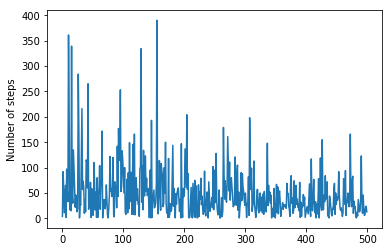

[['r' 'r' 'r' 'r' 'r' 'r' 'r' 'l']
 ['r' 'r' 'r' 'r' 'r' 'r' 'u' 'u']
 ['r' 'r' 'r' 'u' 'u' 'u' 'u' 'u']
 ['r' 'r' 'r' 'u' 'r' 'r' 'u' 'u']
 ['r' 'r' 'r' 'u' 'u' 'u' 'u' 'u']
 ['r' 'r' 'u' 'u' 'r' 'u' 'u' 'u']
 ['u' 'r' 'r' 'r' 'r' 'r' 'u' 'u']
 ['u' 'r' 'r' 'r' 'r' 'r' 'u' 'u']]
Time: 3.70028018951416


In [166]:
start = time.time()
steps = learningAgent([7,0], world, rewardGrid, utilities)
end = time.time()
plt.plot(steps)
plt.ylabel('Number of steps')
plt.show()
evaluate(world, utilities, [0,0], rewardGrid)

print("Time:", end - start)


## Best run

['r' 'r' 'r' 'r' 'r' 'r' 'r' 'd']

['u' 'r' 'r' 'r' 'r' 'r' 'r' 'u']

['r' 'r' 'r' 'r' 'r' 'r' 'u' 'u']

['r' 'r' 'r' 'r' 'r' 'u' 'u' 'u']

['r' 'r' 'r' 'r' 'u' 'u' 'u' 'u']

['r' 'r' 'r' 'u' 'u' 'u' 'u' 'u']

['u' 'u' 'u' 'u' 'u' 'u' 'u' 'u']

['u' 'u' 'u' 'u' 'u' 'u' 'u' 'u']


Time: 13.920183181762695

Count = 2000
alpha = 60/(59 + ns[lastX][lastY])
epsilon = max(1 - (0.00001 * np.sum(totalSteps)), 0.05)


In [167]:
loopUtil = [
    [300, 300, 1, 5, 6, 1, 3, 5000],
    [6, 7, 20, 21, 4, 7, 2, 4],
    [5, 8, 19, 22, 3, 8, 1, 6],
    [4, 9, 18, 23, 2, 9, 20, 7],
    [3, 10, 17, 24, 1, 10, 9, 8],
    [2, 11, 16, 25, 1, 2, 8, 6],
    [1, 12, 15, 26, 29, 4, 7, 10],
    [0, 170, 14, 27, 28, 5, 6, 12]
]
evaluate(world, loopUtil, [0,0], rewardGrid)

continue 0 0
continue 0 1
continue 0 2
continue 0 3
continue 0 4
continue 0 5
continue 1 0
continue 1 1
continue 1 2
continue 1 3
continue 1 4
continue 1 5
continue 1 6
continue 2 0
continue 2 1
continue 2 2
continue 2 3
continue 2 4
continue 2 5
continue 2 6
continue 2 7
continue 3 0
continue 3 1
continue 3 2
continue 3 3
continue 3 4
continue 3 5
continue 3 6
continue 3 7
continue 4 0
continue 4 1
continue 4 2
continue 4 3
continue 4 4
continue 4 5
continue 4 6
continue 4 7
continue 5 0
continue 5 1
continue 5 2
continue 5 3
continue 5 4
continue 5 5
continue 5 6
continue 5 7
continue 6 2
continue 6 3
continue 6 4
continue 6 5
continue 6 6
continue 6 7
continue 7 3
continue 7 4
continue 7 5
continue 7 6
continue 7 7
[['r*' 'l*' 'l*' 'd*' 'l*' 'd*' 'r' 'd']
 ['u*' 'u*' 'r*' 'd*' 'l*' 'd*' 'l*' 'u']
 ['r*' 'r*' 'r*' 'd*' 'l*' 'd*' 'd*' 'd*']
 ['r*' 'r*' 'r*' 'd*' 'l*' 'r*' 'l*' 'l*']
 ['r*' 'r*' 'r*' 'd*' 'l*' 'r*' 'u*' 'l*']
 ['r*' 'r*' 'r*' 'd*' 'd*' 'u*' 'u*' 'd*']
 ['r' 'd' 'r*' 'r